In [126]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [81]:
data = pd.read_csv('D:\\data sets\\titanic.csv')

In [82]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [84]:
data['Sex'].replace({'male':0, 'female':1}, inplace=True)

In [85]:
data

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
...,...,...,...,...,...
886,0,2,0,27.0,13.0000
887,1,1,1,19.0,30.0000
888,0,3,1,NaN,23.4500
889,1,1,0,26.0,30.0000


In [86]:
data.Age = data.Age.fillna(data.Age.mean())

In [87]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [88]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [89]:
data_survived = data[data['Survived']==1]
data_survived = data_survived.head(200)

In [90]:
while(data['Survived'].value_counts()[1]<350):
    data = data.append(data_survived, ignore_index=True)

In [91]:
data.Survived.value_counts()

0    549
1    542
Name: Survived, dtype: int64

In [92]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
dtype: object

In [93]:
x = data.drop(['Survived'], axis=1)
y = data['Survived']

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=111)

In [139]:
model = KNeighborsClassifier(n_neighbors=7)

In [140]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [141]:
model.score(x_train,y_train)

0.7614678899082569

In [142]:
model.score(x_test,y_test)

0.7488584474885844

In [143]:
pred = model.predict(x_test)
pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [144]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76       116
           1       0.72      0.77      0.74       103

    accuracy                           0.75       219
   macro avg       0.75      0.75      0.75       219
weighted avg       0.75      0.75      0.75       219



In [145]:
print(confusion_matrix(pred, y_test))

[[85 31]
 [24 79]]


In [152]:
#Now iterating the algorithm to find the best value of K
list1 = []
accuracy = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    mat = confusion_matrix(pred,y_test)
    acc = mat.diagonal().sum()/mat.sum()*100
    list1.append(acc)
    accuracy.append(np.mean(pred == y_test))  

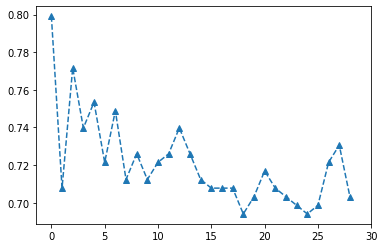

In [155]:
import matplotlib.pyplot as plt
plt.plot(range(len(accuracy)),accuracy,linestyle = 'dashed',marker = '^')
plt.xlim(right = 30)
plt.show()

In [156]:
value=range(1,50)
dataframe = pd.DataFrame({'kvalue':range(len(list1)),'accuracy':list1}).sort_values('accuracy',ascending=False)
dataframe

,kvalue,accuracy
0,0,79.908676
2,2,77.168950
4,4,75.342466
6,6,74.885845
3,3,73.972603
12,12,73.972603
27,27,73.059361
8,8,72.602740
11,11,72.602740
13,13,72.602740
